In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [7]:
house_df = pd.read_csv('house_price_prediction_prelim_features.csv')

In [8]:
house_df.head(3)

,price,bed,bath,sqft,zip,house_type,year_built,heating,cooling,lot_size,num_photos,population,density,Average household income,House_age
0,1925000.0,2,2,1212,11215,Condo,2009,Forced air,Central,10174.0,13,69873,12404,53313.0,12
1,330000.0,4,2,1629,11412,SingleFamily,1930,No Data,No Data,5057.0,3,37857,8874,48536.0,91
2,559000.0,3,3,1800,10314,SingleFamily,2003,"Forced air, Gas",Central,1711.0,25,89792,2534,59560.0,18


In [15]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1348 non-null   float64
 1   bed                       1348 non-null   int64  
 2   bath                      1348 non-null   int64  
 3   sqft                      1348 non-null   int64  
 4   zip                       1348 non-null   int64  
 5   house_type                1348 non-null   object 
 6   year_built                1348 non-null   int64  
 7   heating                   1348 non-null   object 
 8   cooling                   1348 non-null   object 
 9   lot_size                  1144 non-null   float64
 10  num_photos                1348 non-null   int64  
 11  population                1348 non-null   int64  
 12  density                   1348 non-null   int64  
 13  Average household income  1348 non-null   float64
 14  House_ag

In [16]:
house_df['lot_size'] = house_df['lot_size'].fillna(0)

In [17]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1348 non-null   float64
 1   bed                       1348 non-null   int64  
 2   bath                      1348 non-null   int64  
 3   sqft                      1348 non-null   int64  
 4   zip                       1348 non-null   int64  
 5   house_type                1348 non-null   object 
 6   year_built                1348 non-null   int64  
 7   heating                   1348 non-null   object 
 8   cooling                   1348 non-null   object 
 9   lot_size                  1348 non-null   float64
 10  num_photos                1348 non-null   int64  
 11  population                1348 non-null   int64  
 12  density                   1348 non-null   int64  
 13  Average household income  1348 non-null   float64
 14  House_ag

# Building a Baseline Model: 

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create an empty model
lm = LinearRegression()

In [95]:
#Fitting a simple model to include only numeric features

X = house_df[['bed', 'bath', 'sqft', 'zip', 'year_built', 'House_age', 'lot_size', 'num_photos', 'population', 'density', 'Average household income']]

#Target

y= house_df['price']


In [96]:
#Split the data 80 - 20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 42)

### Standard Scaling

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [98]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [99]:
X_tr = std.transform(X_train.values)

In [100]:
X_te = std.transform(X_test.values)

In [101]:
# Fit  
lm.fit(X_tr, y_train)

LinearRegression()

In [102]:
lm.score(X_tr, y_train)

0.33533850781871744

In [103]:
lm.score(X_te, y_test)

0.45001291994638726

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [105]:
# Compare the actual y values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lm.predict(X_tr)
y_predicted_train.shape

(1078,)

In [106]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

3640922.678890539

In [107]:
# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lm.predict(X_te)
y_predicted_test.shape

(270,)

In [108]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

3412205.801578648

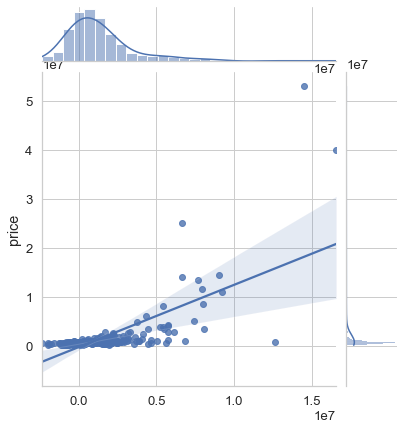

In [109]:
preds = lm.predict(X_te)

sns.jointplot(x=preds,y=y_test, kind='reg')

In [115]:
#Looks like data needs to be log transformed 

In [111]:
import statsmodels.api as sm

In [112]:
#Create the model
model = sm.OLS(y_train, sm.add_constant(X_tr)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     53.83
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.01e-87
Time:                        17:12:34   Log-Likelihood:                -17816.
No. Observations:                1078   AIC:                         3.565e+04
Df Residuals:                    1067   BIC:                         3.571e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.651e+06   1.11e+05     14.815      0.000    1.43e+06    1.87e+06
x1         -1.637e+04   1.54e+05     -0.106      0.915   -3.19e+05    2.86e+05
x2          1.651e+06   1.58e+05     10.484      0.000    1.34e+06    1.96e+06
x3          2.586e+05   1.15e+05      2.244      0.025    3.25e+04    4.85e+05
x4         -2.309e+05   1.39e+05     -1.664      0.096   -5.03e+05    4.13e+04
x5         -7.428e+04   5.71e+04     -1.302      0.193   -1.86e+05    3.77e+04
x6          7.428e+04   5.71e+04      1.302      0.193   -3.77e+04    1.86e+05
x7         -8382.3803   1.12e+05     -0.075      0.940   -2.27e+05    2.11e+05
x8         -9.543e+04   1.23e+05     -0.775      0.439   -3.37e+05    1.46e+05
x9         -6.352e+05    1.2e+05     -5.273      0.000   -8.72e+05   -3.99e+05
x10         1.521e+06   1.24e+05     12.280      0.000    1.28e+06    1.76e+06
x11         1.105e+06   1.27e+05      8.697      0.000    8.56e+05    1.35e+06
==============================================================================
Omnibus:                     1635.767   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           833992.426
Skew:                           8.763   Prob(JB):                         0.00
Kurtosis:                     138.131   Cond. No.                     3.33e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Diagnostic Plots

In [113]:
import scipy.stats as stats
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

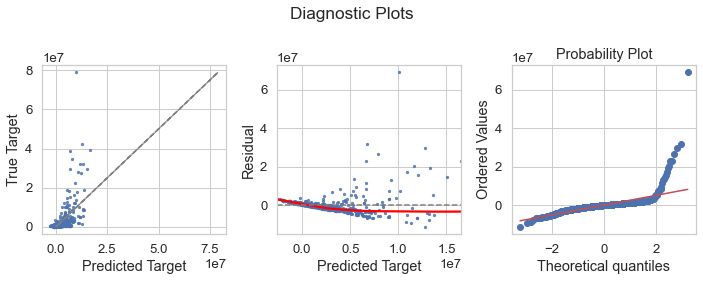

In [114]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)

- In the left plot the points are bunched up, to fix this we may need to log transform our target



- In the middle plot the line is relatively horizontal, but the points are not random. There seems to be little variability on the left hand side and a lot of variability on the right hand rise. The values also seem to be increasing. These observations would then violate the assumption of homoskadaskicity of variance. A solution may be to ulilize a box-cox transformation may help normalize the distribution. Could try to log transform or sqrt transform as well. 



- In the right plot the values approximate the red line well in the beginning and then tail off at the larger values. To fix this problem we could square the values or log transform.